# Heart Attack Exploratory Data Analysis

## Importing Libraries

In [55]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## Loading the Dataset

You can access the dataset from kaggle [here](https://www.kaggle.com/datasets/bharath011/heart-disease-classification-dataset).

In [56]:
df = pd.read_csv('Heart Attack.csv')
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [57]:
df.shape

(1319, 9)

In [58]:
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [59]:
df.isnull().sum()

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


### Overview of the Dataset
- We have 1319 rows and 9 columns
- There are no null values in the dataset
- We will need to one hot encode the `gender` variable
- We will need to convert values in the `class` column to 0 and 1
- We will also need to deal with some obvious outliers probably caused by human error

## Now it's time for some plotting

### 1. Age

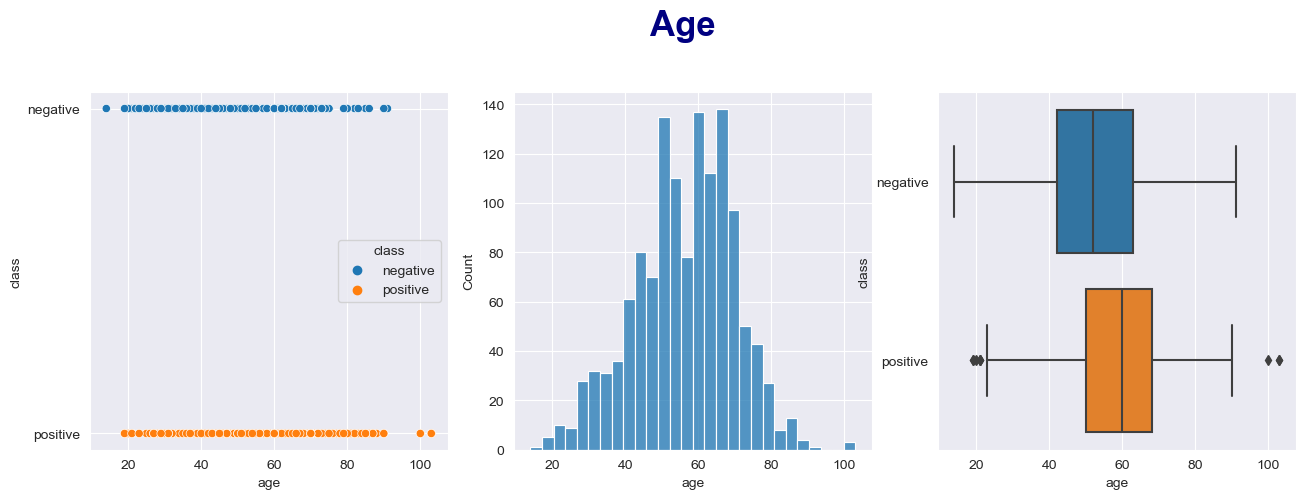

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Age', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)
# ax1
sns.scatterplot(data=df, x='age', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='age', ax=axes[1])

# ax3
sns.boxplot(data=df, x='age', y='class', ax=axes[2])

plt.show()

### 2. Gender

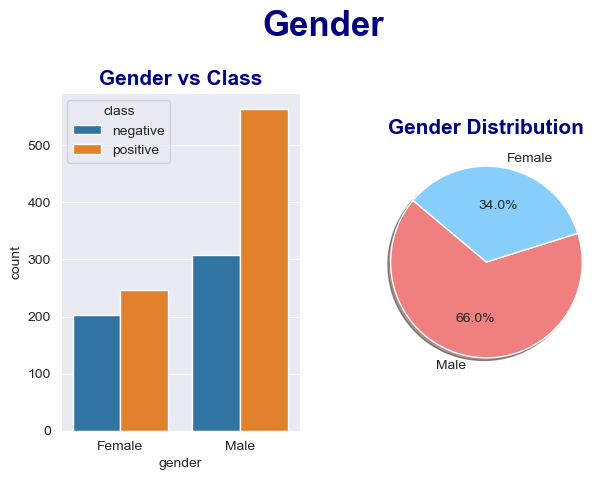

In [62]:
# Create subplots
fig, axes = plt.subplots(1, 2)
plt.suptitle('Gender', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1: Countplot
sns.countplot(data=df, x='gender', ax=axes[0], hue='class')
axes[0].set_title('Gender vs Class', fontsize=15,
                  fontweight='bold', color='navy')
axes[0].set_xticklabels(['Female', 'Male'], )

# ax2: Pie Chart
gender_counts = df['gender'].value_counts()
labels = ['Male', 'Female']
sizes = gender_counts.values
colors = ['lightcoral', 'lightskyblue']  # Colors for the pie slices

axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
axes[1].set_title('Gender Distribution', fontsize=15,
                  fontweight='bold', color='navy')

plt.show()

### 3. Impulse

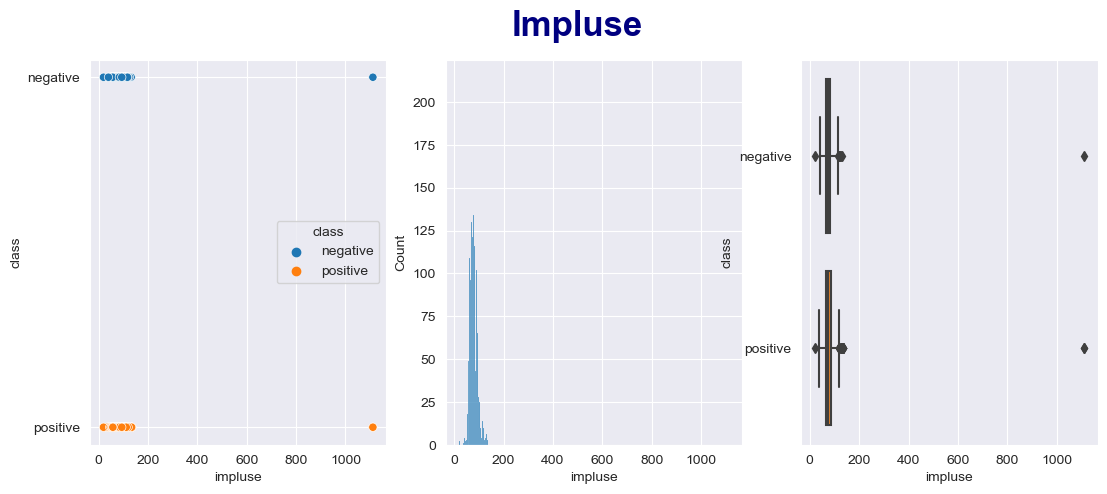

In [63]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Impluse', fontsize=25, fontweight='bold', color='navy')

# ax1
sns.scatterplot(data=df, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='impluse', ax=axes[1])

# ax3
sns.boxplot(data=df, x='impluse', y='class', ax=axes[2])

plt.show()

Some values are obvious outliers, let's clean to have a clearer visualization of the data


***Dealing with the faulty data***

In [64]:
df[df.impluse > 1000]

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
63,45,1,1111,141,95,109.0,1.33,1.010,positive
717,70,0,1111,141,95,138.0,3.87,0.028,positive
1069,32,0,1111,141,95,82.0,2.66,0.008,negative


In [65]:
condition = df.impluse < 1000
df = df[condition]

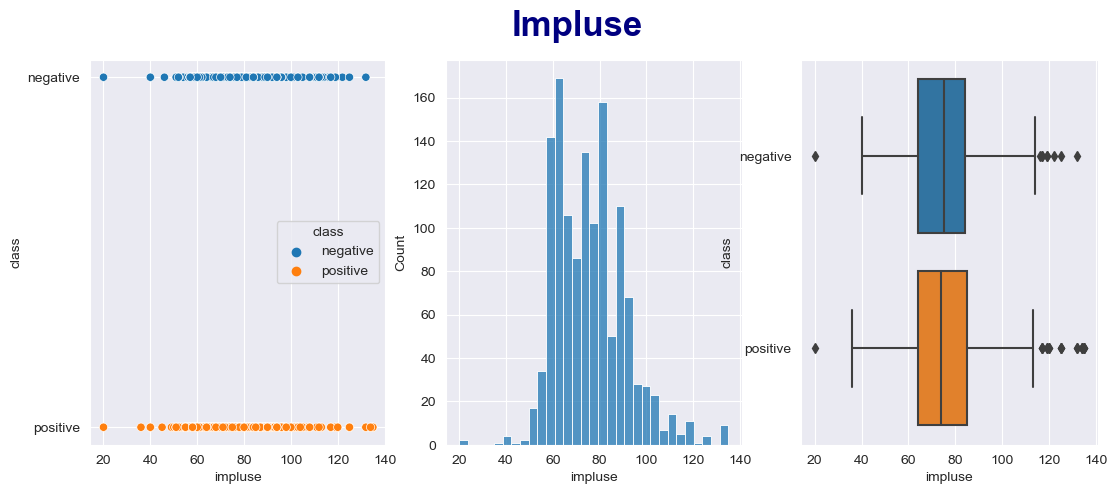

In [66]:
# Col3 : impluse
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Impluse', fontsize=25, fontweight='bold', color='navy')

# ax1
sns.scatterplot(data=df, x='impluse', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='impluse', ax=axes[1])

# ax3
sns.boxplot(data=df, x='impluse', y='class', ax=axes[2])

plt.show()

### 4. Pressure High

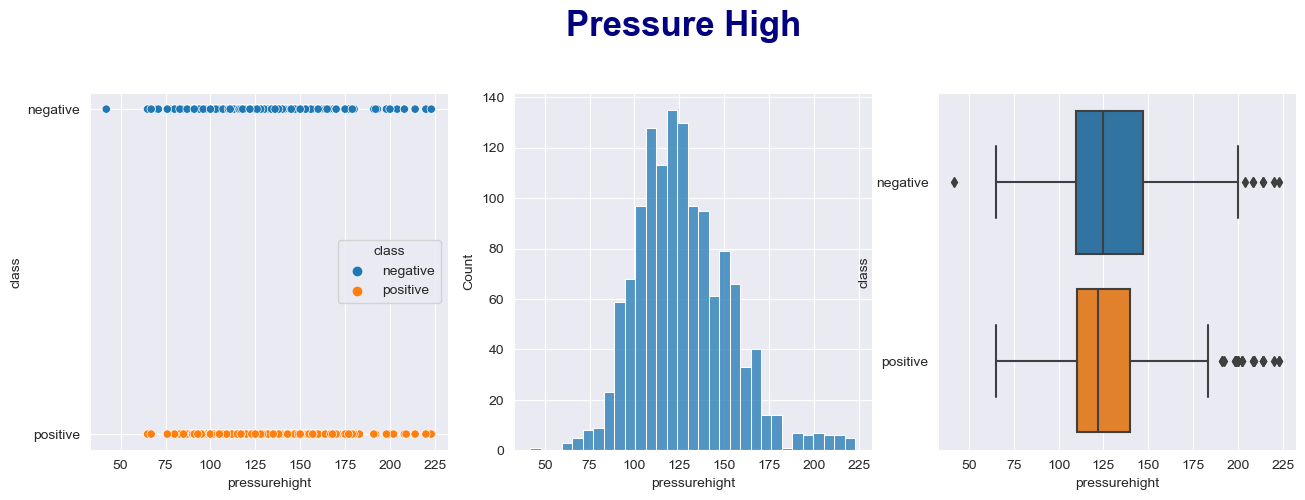

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Pressure High', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='pressurehight', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='pressurehight', ax=axes[1])

# ax3
sns.boxplot(data=df, x='pressurehight', y='class', ax=axes[2])

plt.show()

### 5. Pressure Low

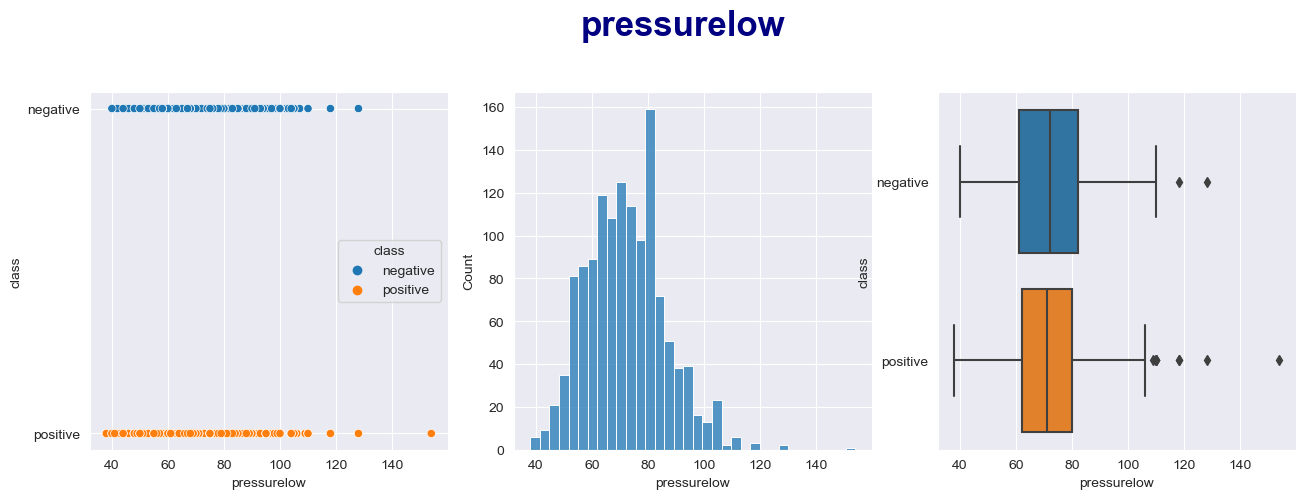

In [68]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('PressureLow', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='pressurelow', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='pressurelow', ax=axes[1])

# ax3
sns.boxplot(data=df, x='pressurelow', y='class')
plt.show()

### 6. Glucose

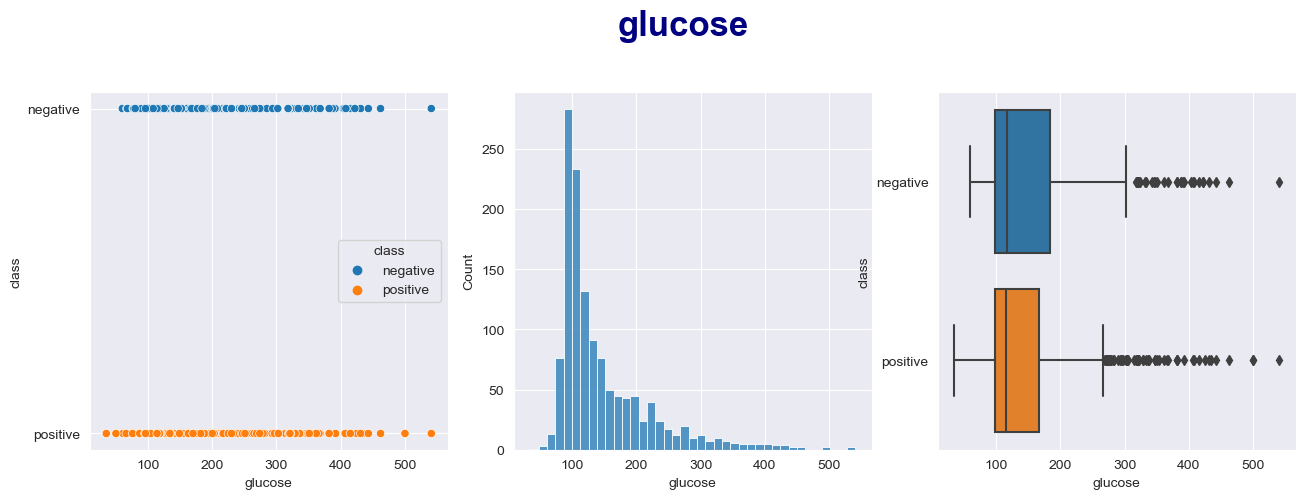

In [69]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('glucose', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='glucose', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='glucose', ax=axes[1])

# ax3
sns.boxplot(data=df, x='glucose', y='class')
plt.show()

### 7. CK-MB

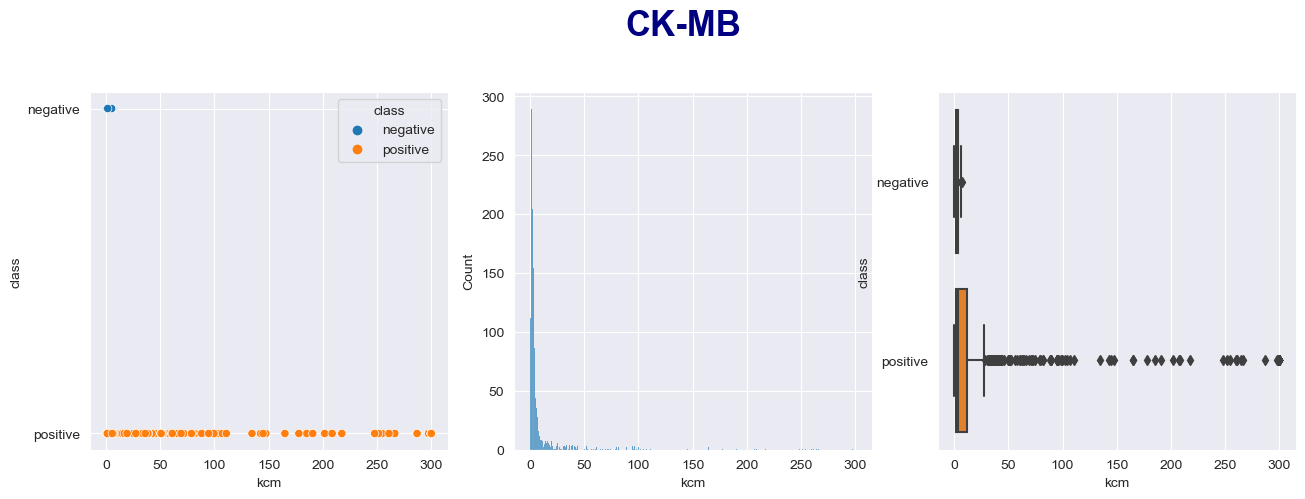

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('CK-MB', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='kcm', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='kcm', ax=axes[1])

# ax3
sns.boxplot(data=df, x='kcm', y='class')
plt.show()

### 8. Troponin

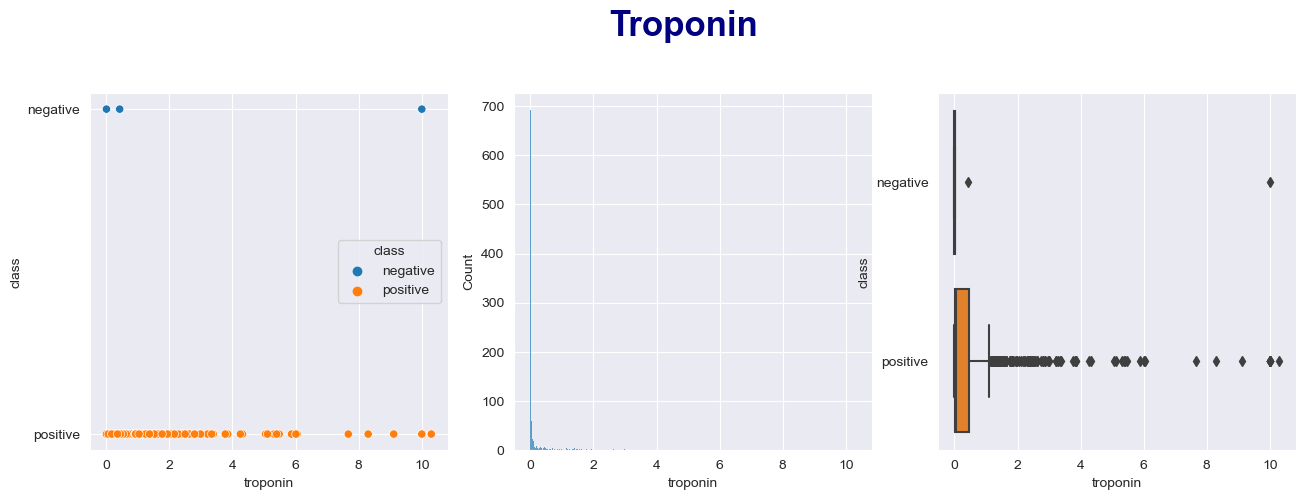

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='troponin', ax=axes[1])

# ax3
sns.boxplot(data=df, x='troponin', y='class')
plt.show()

*Clean the `CK-MB` and `Troponin` data from outliers to plot them again*

In [72]:
z_scores = stats.zscore(df[['troponin', 'kcm']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

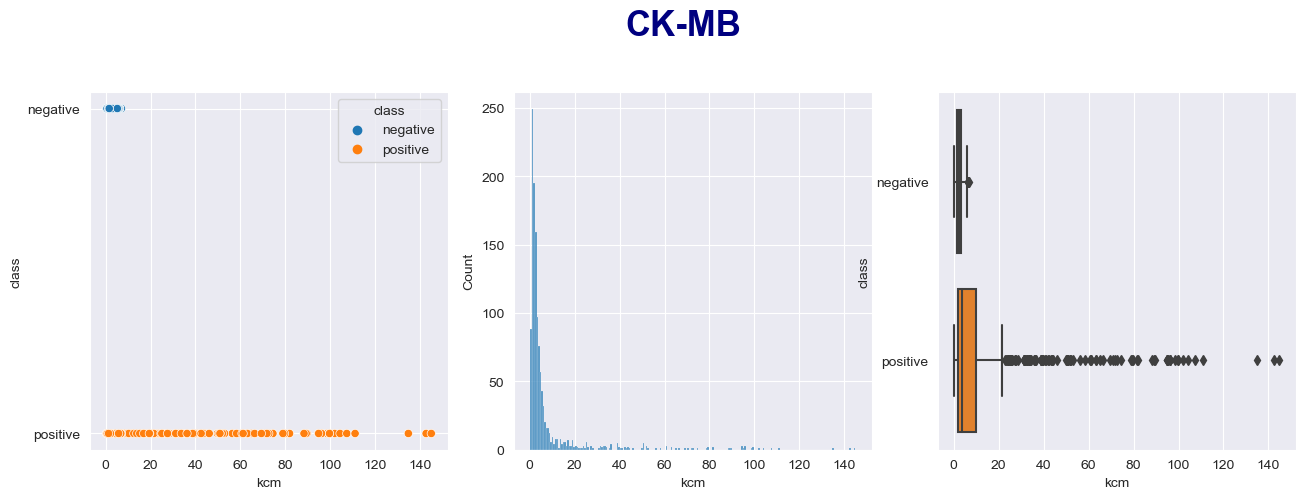

In [73]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('CK-MB', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='kcm', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='kcm', ax=axes[1])

# ax3
sns.boxplot(data=df, x='kcm', y='class')
plt.show()

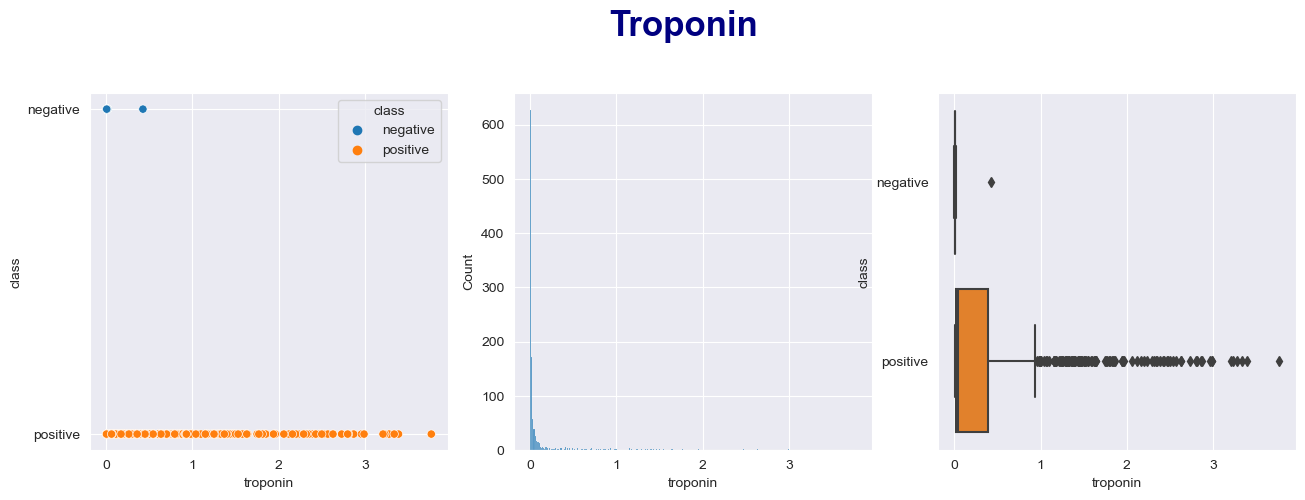

In [74]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
plt.suptitle('Troponin', fontsize=25, fontweight='bold', color='navy')
fig.tight_layout(pad=2.0)

# ax1
sns.scatterplot(data=df, x='troponin', y='class', ax=axes[0], hue='class')

# ax2
sns.histplot(data=df, x='troponin', ax=axes[1])

# ax3
sns.boxplot(data=df, x='troponin', y='class')
plt.show()

### Correlation Matrix

- but first we need to convert the class column to numerical values

In [75]:
# Converting class column to numerical data
df['class'] = df['class'].replace({'positive': 1, 'negative': 0})

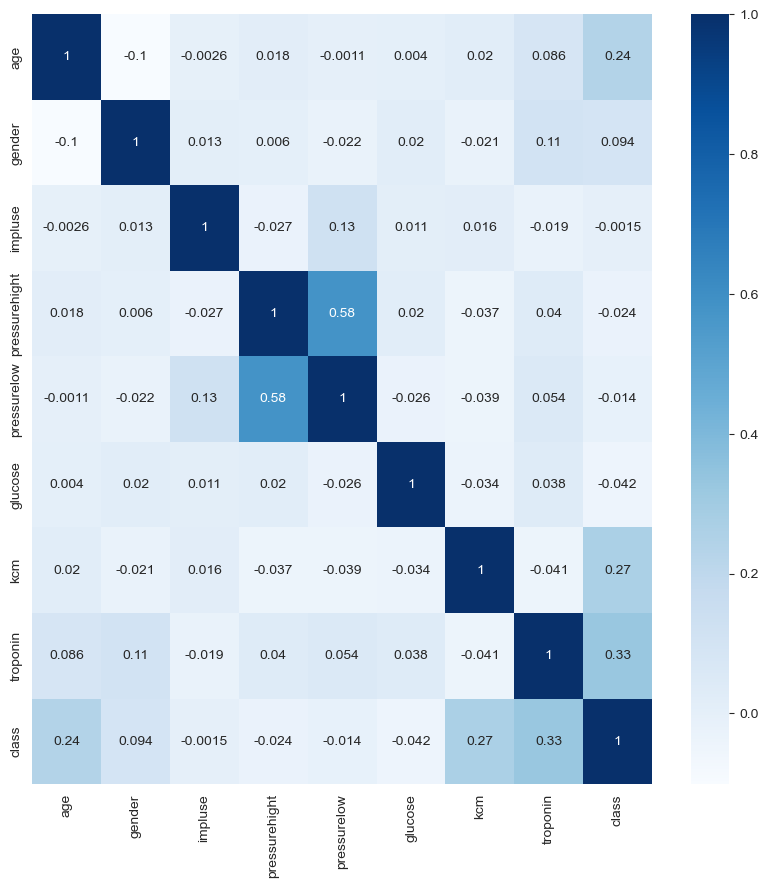

In [76]:
# Create and plot the correlation matrix
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

## Conclusion

1. `Age`, the dataset spans ages from children to elderly people, and it can be noticed that people with heart diseases are on overage older than those without heart diseases.
2. `Gender`, the dataset consists mostly of males (66%), and males are more likely to suffer from heart diseases than females.
3. `Impulse`, the dataset consists mostly of people with normal impulse, and there doesn't seem to be any correlation between impulse and heart diseases.
4. `Pressure High` and `Pressure Low`, the data is normally distributed, and there doesn't seem to be an obvious correlation between pressure and heart diseases.
5. `Glucose`, the data is right skewed, and there's no high correlation between glucose and heart diseases.
6. `CK-MB` and `Troponin`, the data is right skewed, and there's an obvious correlation between both of them and heart diseases.

- We will need to deal with the outliers in the `CK-MB` and `Troponin` columns
- We will also apply log transformation to the `Glucose`, `CK-MB` and `Troponin` columns to make them more normally distributed